In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-india-movies/IMDb Movies India.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

In [3]:
data = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', encoding='ISO-8859-1')

print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:
print(data.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [5]:
missing_percent = (data.isnull().sum()/len(data))*100
print(missing_percent)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64


In [7]:
threshold = 50
columns_to_drop = missing_percent[missing_percent > threshold].index
data.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {columns_to_drop}")

Dropped columns: Index(['Duration'], dtype='object')


In [8]:
data['Year'] = data['Year'].astype(str).str.replace(r'[^0-9]', '', regex=True)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Year'].fillna(0, inplace=True)
data['Year'] = data['Year'].astype(int)

/tmp/ipykernel_36/246086623.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Year'].fillna(0, inplace=True)


In [9]:
data['Year']

0           0
1        2019
2        2021
3        2019
4        2010
         ... 
15504    1988
15505    1999
15506    2005
15507    1988
15508    1998
Name: Year, Length: 15509, dtype: int64

In [10]:
data['Rating'].fillna(0, inplace=True)
data['Votes'] = data['Votes'].astype(str).str.replace(',', '', regex=True)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Votes'].fillna(0, inplace=True)

/tmp/ipykernel_36/3410429509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(0, inplace=True)
/tmp/ipykernel_36/3410429509.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [11]:
numerical_columns = ['Year', 'Votes', 'Rating']
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].median(), inplace=True)

# Check for remaining NaNs in numerical columns
print("Remaining NaNs in numerical columns:")
print(data[numerical_columns].isnull().sum())

Remaining NaNs in numerical columns:
Year      0
Votes     0
Rating    0
dtype: int64


/tmp/ipykernel_36/406355108.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [12]:
q1 = np.percentile(data['Votes'], 25)
q3 = np.percentile(data['Votes'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['Votes'] >= lower_bound) & (data['Votes'] <= upper_bound)]

In [13]:
categorical_columns = ['Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Director']
for col in categorical_columns:
    data[col].fillna('Unknown', inplace=True)

top_n = 20
for col in categorical_columns:
    top_categories = data[col].value_counts().nlargest(top_n).index
    data[col] = data[col].apply(lambda x: x if x in top_categories else 'Other')

data['Director_Avg_Rating'] = data.groupby('Director')['Rating'].transform('mean')
data['Actor_1_Popularity'] = data.groupby('Actor 1')['Actor 1'].transform('count')
data['Director_Avg_Rating'].fillna(data['Director_Avg_Rating'].median(), inplace=True)
data['Actor_1_Popularity'].fillna(data['Actor_1_Popularity'].median(), inplace=True)



encoded_data = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, encoded_data], axis=1).drop(categorical_columns, axis=1)

/tmp/ipykernel_36/2698885888.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)
/tmp/ipykernel_36/2698885888.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


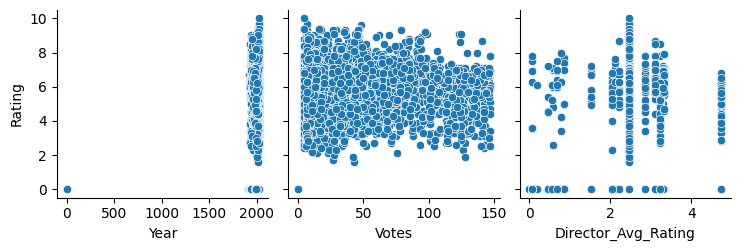

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot relationships between features and target
sns.pairplot(data, x_vars=['Year', 'Votes', 'Director_Avg_Rating'], y_vars='Rating', kind='scatter')
plt.show()

In [15]:
X = data[['Year', 'Votes', 'Director_Avg_Rating', 'Actor_1_Popularity']]
y = data['Rating']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=0.80)  # Retain 80% of the variance
X_pca_reduced = pca.fit_transform(X_scaled)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.6634599031799349
R-squared: 0.9234169380824864


In [20]:
y_train_pred = model.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training R²: {train_r2}')

# Evaluate on test data
test_r2 = r2_score(y_test, y_pred)
print(f'Test R²: {test_r2}')

Training R²: 0.9761065115230568
Test R²: 0.9234169380824864


In [21]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {scores}')
print(f'Mean R²: {scores.mean()}')

Cross-Validation R² Scores: [0.92679897 0.92890503 0.91775484 0.92507602 0.92406873]
Mean R²: 0.9245207173822049
